# Lab 2 - Classification

Name: Đinh Vũ Gia Hân 

Class: 22KHMT2

ID: 22127098 

# Self-evaluation

| No.   | Details                                       | Level of completion     |
|-------|-----------------------------------------------|-------------------------|
| 1     | Classification algorithms implementation.     | 50%                     |
| 2     | Evaluation.                                   | 25%                     |
| 3     | Comaprison and Analysis.                      | 25%                     |
|       | Total                                         | 100%                    |

# Import neccessary library

This lab use the following libraries:
- **numpy**: for matrix operations and numerical processing
- **pandas**: for tabular data manipulation
- **mathplotlib**: for plotting data
- **seaborn**: for data visualization
- **warnings**: for ignoring warnings when plotting data 

In [1]:
# import libraries
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt  
import seaborn as sns             
import warnings                  
warnings.filterwarnings('ignore') 

# Read dataset

First, we use pandas.read_csv() to read the data in tabular format from the preprocessed adult.csv file from previous lab and save it as `dataset`. Then, we make a copy named `df` of `dataset`, which will be classified.

The preprocessed dataset contains only 11 features:
- `age`: The age of the individual.
- `workclass`: The type of employment.
- `education`: The level of education.
- `marital-status`: Marital status.
- `occupation`: Occupation.
- `race`: Race.
- `capital-gain`: Income from capital (not from wages).
- `capital-loss`: Loss from capital (from investments).
- `hours-per-week`: The number of hours worked per week.
- `native-country`: Country of origin.
- `income`: Representing the individual's income.

Within, `income` is the target value.

In [2]:
# define column names
column_names = ["age", "workclass", "education", "marital-status", "occupation", "race", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# load the dataset with these column names
dataset = pd.read_csv("adult.csv", header=None, names=column_names)

# make a copy of the dataset
df = dataset.copy()

In [3]:
# display the first 5 rows of the dataset
df.head(5)

,age,workclass,education,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,0,5,5,1,4,0,1,0.375,0,0
1,2,1,5,6,0,4,0,1,0.000,0,0
2,1,2,2,4,2,4,0,1,0.375,0,0
3,2,2,1,6,2,3,0,1,0.375,0,0
4,0,2,5,6,0,3,0,1,0.375,1,0


In [4]:
# print the shape of the dataset
print(df.shape)

(32538, 11)


# Split dataset

To ensure reproducibility, we'll first shuffle the data with `random_state = 42`. Next, we'll split the dataset into two sets:
- Feature set (X): Contains the features used for prediction.
- Target set (y): Contains the target variables to be predicted.

Finally, we'll use the `train_test_split` function from **scikit-learn** to divide the dataset into a 70% training set and a 30% test set, again setting `random_state = 42` for reproducibility.

In [5]:
from sklearn.model_selection import train_test_split

# shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# split into feature set (X) and target set (y)
X = df.drop("income", axis=1)
y = df["income"]

# add column ones to the feature set
# X = np.hstack([np.ones((X.shape[0], 1)), X])

In [6]:
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print the shapes of the training and test sets
print(f'Shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}')
print(f'Shape of X_test:  {X_test.shape}, shape of y_test:  {y_test.shape}')

Shape of X_train: (22776, 10), shape of y_train: (22776,)
Shape of X_test:  (9762, 10), shape of y_test:  (9762,)


# Classification algorithms implementation

In this lab, we'll utilize the classes from **scikit-learn** library to implement the classification algorithms. 
- `GridSearchCV`: used to run through all the different parameters that is fed into the parameter grid and produce the best combination of parameters, based on a accuracy metric. 
- `classification_report`: used to build detailed classification reports to assess the performance of our models.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## 1. Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

# define the parameter grid for Decision Tree
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15, None]
}

# instantiate the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# grid search to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# print the best parameters 
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

# compute the predicted values 
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

# print the classification report
print("Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10}
Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7386
           1       0.74      0.52      0.61      2376

    accuracy                           0.84      9762
   macro avg       0.80      0.73      0.76      9762
weighted avg       0.83      0.84      0.83      9762



## 2. Enssemble Model: Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# define the parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# instantiate the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# grid search to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# print the best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# compute the predicted values
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# print the classification report
print("Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Best parameters for Random Forest: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 50}
Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7386
           1       0.69      0.56      0.62      2376

    accuracy                           0.83      9762
   macro avg       0.78      0.74      0.75      9762
weighted avg       0.82      0.83      0.82      9762



## 3. Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

# define the parameter grid for Naive Bayes
param_grid_nb = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
}

# instantiate the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# grid search to find the best parameters
grid_search_nb = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# print the best parameters
print("Best parameters for Naive Bayes:", grid_search_nb.best_params_)

# compute the predicted values
y_pred_nb = grid_search_nb.best_estimator_.predict(X_test)

# print the classification report
print("Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Best parameters for Naive Bayes: {'var_smoothing': 1e-09}
Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      7386
           1       0.71      0.22      0.34      2376

    accuracy                           0.79      9762
   macro avg       0.75      0.60      0.61      9762
weighted avg       0.77      0.79      0.74      9762



## 4. Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC

# define the parameter grid for SVM
param_grid_svm = {
    "kernel": ["linear", "poly", "sigmoid"],
    "C": [0.1, 1, 10],
}

# instantiate the SVM classifier
svm = SVC(random_state=42)

# grid search to find the best parameters
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# print the best parameters
print("Best parameters for SVM:", grid_search_svm.best_params_)

# compute the predicted values
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# print the classification report
print("Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Best parameters for SVM: {'C': 10, 'kernel': 'poly'}
Report for SVM:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7386
           1       0.76      0.49      0.60      2376

    accuracy                           0.84      9762
   macro avg       0.81      0.72      0.75      9762
weighted avg       0.83      0.84      0.83      9762



## 5. Neural Network: Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

# define the parameter grid for MLP
param_grid_mlp = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)],
    "activation": ["relu", "tanh", "logistic"],
    "learning_rate": ["constant", "adaptive"]
}

# instantiate the MLP classifier with adam solver to make it faster
mlp = MLPClassifier(max_iter=300, solver="adam", random_state=42)

# grid search to find the best parameters
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)

# print the best parameters
print("Best parameters for MLP:", grid_search_mlp.best_params_)

# compute the predicted values
y_pred_mlp = grid_search_mlp.best_estimator_.predict(X_test)

# print the classification report
print("Report for MLP:")
print(classification_report(y_test, y_pred_mlp))

Best parameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Report for MLP:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7386
           1       0.73      0.53      0.62      2376

    accuracy                           0.84      9762
   macro avg       0.80      0.74      0.76      9762
weighted avg       0.83      0.84      0.83      9762



# Evaluation

## Performance Overview - Metrics for Positive and Negative Classes

In [14]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score)

def evaluate_model(y_test, y_pred, model_name="Model"):
    """ 
    Function to evaluate the performance of a classification model
    
    Parameters:
    ----------
    y_test : np.array
        True labels
    y_pred : np.array
        Predicted labels
    model_name : str
        Name of the model
    """
    print(f"Evaluation for {model_name}:\n")
    
    # show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # performance overview
    accuracy = accuracy_score(y_test, y_pred)

    # metrics for positive and negative class
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    # print the performance metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"F1 Score: {f1:.2f}")

Evaluation for Decision Tree:



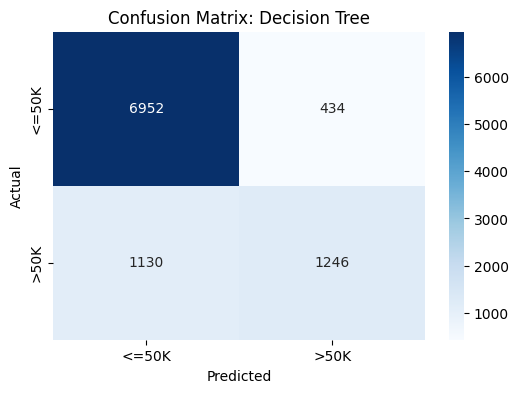

Accuracy: 0.84
Precision: 0.74
Recall (Sensitivity): 0.52
Specificity: 0.94
F1 Score: 0.61


In [15]:
# compute the predicted values and probabilities on the test set
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
y_prob_dt = grid_search_dt.best_estimator_.predict_proba(X_test)[:, 1]

# evaluate the Decision Tree model
evaluate_model(y_test, y_pred_dt, model_name="Decision Tree")

Evaluation for Random Forest:



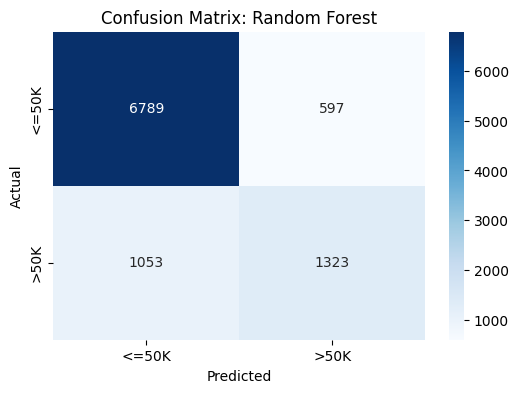

Accuracy: 0.83
Precision: 0.69
Recall (Sensitivity): 0.56
Specificity: 0.92
F1 Score: 0.62


In [16]:
# compute the predicted values and probabilities on the test set
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_prob_rf = grid_search_rf.best_estimator_.predict_proba(X_test)[:, 1]

# evaluate the Random Forest model
evaluate_model(y_test, y_pred_rf, model_name="Random Forest")

Evaluation for Naive Bayes:



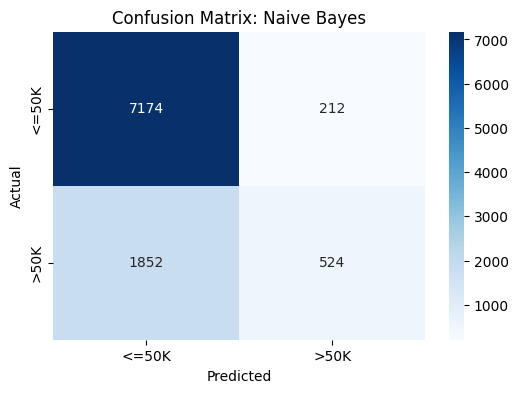

Accuracy: 0.79
Precision: 0.71
Recall (Sensitivity): 0.22
Specificity: 0.97
F1 Score: 0.34


In [17]:
# compute the predicted values and probabilities on the test set
y_pred_nb = grid_search_nb.best_estimator_.predict(X_test)
y_prob_nb = grid_search_nb.best_estimator_.predict_proba(X_test)[:, 1]

# evaluate the Naive Bayes model
evaluate_model(y_test, y_pred_nb, model_name="Naive Bayes")

Evaluation for SVM:



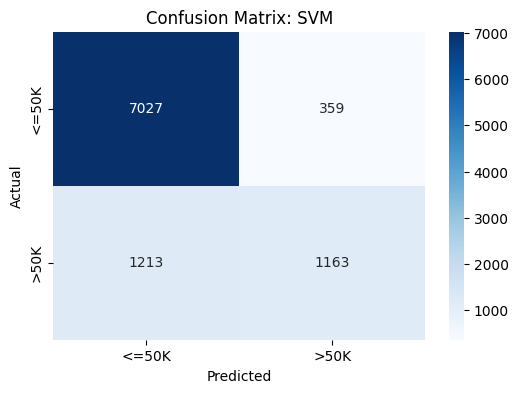

Accuracy: 0.84
Precision: 0.76
Recall (Sensitivity): 0.49
Specificity: 0.95
F1 Score: 0.60


In [18]:
# compute the predicted values and probabilities on the test set
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
y_prob_svm = grid_search_svm.best_estimator_.decision_function(X_test)

# evaluate the SVM model
evaluate_model(y_test, y_pred_svm, model_name="SVM")

Evaluation for MLP:



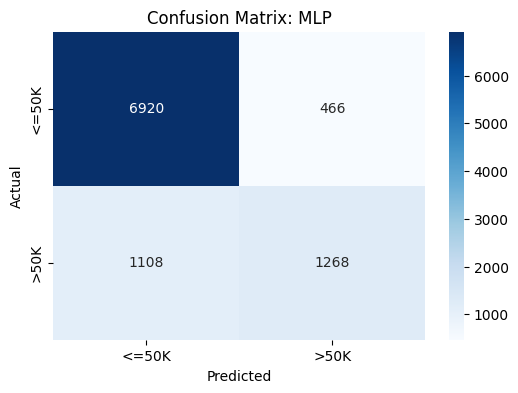

Accuracy: 0.84
Precision: 0.73
Recall (Sensitivity): 0.53
Specificity: 0.94
F1 Score: 0.62


In [19]:
# compute the predicted values and probabilities on the test set
y_pred_mlp = grid_search_mlp.best_estimator_.predict(X_test)
y_prob_mlp = grid_search_mlp.best_estimator_.predict_proba(X_test)[:, 1]

# evaluate the MLP model
evaluate_model(y_test, y_pred_mlp, model_name="MLP")

## Model Discrimination Ability

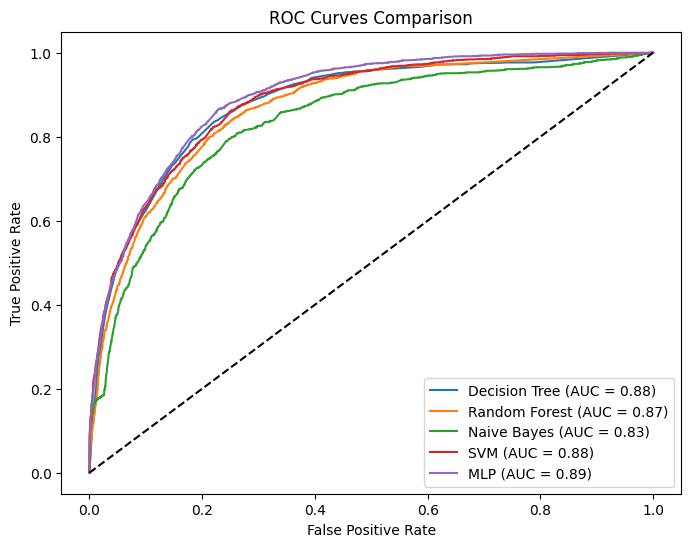

In [ ]:
# set the figure size
plt.figure(figsize=(8, 6))

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=1)
auc_dt = roc_auc_score(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

# Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb, pos_label=1)
auc_nb = roc_auc_score(y_test, y_prob_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm, pos_label=1)
auc_svm = roc_auc_score(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")

# MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp, pos_label=1)
auc_mlp = roc_auc_score(y_test, y_prob_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC = {auc_mlp:.2f})")

# finalize ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Comparison and Analysis

<h4>1. Evaluation metrics comparison</h4>

| Model         | Accuracy | Precision | Recall | Specificity | F1 Score | AUC  |
|---------------|----------|-----------|--------|-------------|----------|------|
| Decision Tree | 0.84     | 0.74      | 0.52   | 0.94        | 0.61     | 0.88 |
| Random Forest | 0.83     | 0.69      | 0.56   | 0.92        | 0.62     | 0.87 |
| Naive Bayes   | 0.79     | 0.71      | 0.22   | 0.97        | 0.34     | 0.83 |
| SVM           | 0.84     | 0.76      | 0.49   | 0.95        | 0.60     | 0.88 |
| MLP           | 0.84     | 0.73      | 0.53   | 0.94        | 0.62     | 0.89 |

- Accuracy:
    - Decision Tree, SVM, and MLP achieved the highest accuracy (0.84) which mean that they perform better overall in predicting both class correctly.
    - Random Forest is slightly smaller (0.83), while Naive Bayes has the lowest accuracy (0.79).
- Precision:
    - SVM has the highest precision (0.76), indicating it predicts fewer false positives than other models.
    - Decision Tree and MLP have competitive precision scores (0.74 and 0.73 respectively).
    - Random Forest (.69) and Naive Bayes (0.71) have the lower precision, meaning they predict more false positives.
- Recall:
    - Random Forest has the highest recall (0.56) which mean that it captures more true positives.
    - Decision Tree and Random Forest follow (0.52 and 0.53 respectively), while SVM has lower recall (0.49).
    - Naive Bayes show the lowest recall values (0.22), indicating it miss the most positive samples.
- Specificity:
    - Naive Bayes performs the best in identifying true negative rate (0.97).
    - SVM is slightly smaller (0.95) which mean that it also well-performed in terms of specificity, while Decision Tree and MLP follow (both 0.94).
    - Random Forest has slightly lower specificity but comparable (0.92).
- F1 Score:
    - Random Forest and MLP lead with an F1 score of 0.62, showing better balance between precision and recall.
    - Decision Tree and SVM are slightly smaller (0.61 and 0.60 respectively).
    - Naive Bayes has the lowest score (0.34), reflecting its inability to recall and precision effectively.
- AUC:
    - MLP shows the best performance (0.90).
    - Decision Tree and SVM are close (0.88), followed by Random Forest (0.87) and Naive Bayes (0.83).

<h4>2. Misclassification analysis using confusion matrix</h4>

| Model         | FP    | FN     | Total misclassifications | 
|---------------|-------|--------|--------------------------|
| Decision Tree | 1130  | 1246   | 2376                     |
| Random Forest | 1053  | 1323   | 2376                     | 
| Naive Bayes   | 1852  | 524    | 2376                     | 
| SVM           | 1213  | 1163   | 2376                     | 
| MLP           | 1108  | 1268   | 2376                     | 

- With false positives:
    - Naive Bayes produces the most false positives (1852) due to its assumption of feature independence.
    - Random Forest has the slowest FP (1180), showing its ability to model complex patterns.
- With false negatives:
    - Naive Bayes performs best with 524 FN but this means that it misclassifies many negatives as positives.
    - SVM shows a moderate number of FN (1163) indicating well-perform in balancing precision and recall.
- Reason for misclassifications:
    - Class imbalance: The positive class is underrepresented compared to the negative class. This leads most models (except Naive Bayes) to favor the majority class, resulting in higher FN for the positive class.
    - Model complexity: Simple models like Naive Bayes struggle with feature dependencies, leading to higher FP. More complex models like SVM or MLP misclassify fewer negatives but need careful tuning for class balance.

<h4>3. Runtime and scalability analysis</h4>

| Model         | Runtime   | Scalability                                                   |
|---------------|-----------|---------------------------------------------------------------|
| Decision Tree | Low       | Highly scalable for small to medium datasets                  | 
| Random Forest | Moderate  | Scalable with parallelism but slower due to ensemble learning |
| Naive Bayes   | Low       | Extremely fast and scalable for large datasets                | 
| SVM           | High      | Computationally expensive, scales poorly with large datasets  | 
| MLP           | High      | Resource-intensive but scalable with proper hardware          | 

- Trade-offs between speed and prediction quality:
    - Decision Tree and Naive Bayes compute fast but sacrifices prediction quality for prediction quality.
    - Random Forest balances speed and prediction quality but can be slower than Decision Tree due to the ensemble approach.
    - SVM and MLP offer better performance at the cost of higher computational requirements.

<h4>4. Recommendation</h4> 

Based on the evaluation metrics, computational cost, and dataset characteristics:
- MLP is recommended if the goal is to maximize overall performance. Because MLP offers the best trade-off between precision, recall and F1 score, showing its ability to learn complex patterns makes it ideal for datasets like this one.
- Random Forest is another strong candidate, with a comparable F1 score and better runtime than MLP.